In [1]:
import sys
sys.path.append('../src')
import P_binary
import P_random
import P_posterior
import const as c
import time
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import corner
import pickle


%matplotlib inline

/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


### Load TGAS catalog and matches

In [2]:
# Read in sample from TGAS table
dtype = [('ID','<i8'),('tyc','S11'),('hip','<i8'),('ra','<f8'),('dec','<f8'),('mu_ra','<f8'),('mu_dec','<f8'), \
     ('mu_ra_err','<f8'),('mu_dec_err','<f8'),('plx','<f8'),('plx_err','<f8')]

tgas_full = np.array([], dtype=dtype)

for i in np.arange(1):
    if i < 10:
        filename = ('../data/TGAS/TgasSource_000-000-00' + str(i) + '.csv')
    else:
        filename = ('../data/TGAS/TgasSource_000-000-0' + str(i) + '.csv')

    print filename
    tgas_tmp = Table.read(filename, format='csv', guess=True)
    
    

    tgas = np.zeros(len(tgas_tmp), dtype=dtype)

    tgas['ID'] = tgas_tmp['source_id']
    tgas['tyc'] = tgas_tmp['tycho2_id']
    tgas['hip'] = tgas_tmp['hip']
    tgas['ra'] = tgas_tmp['ra']
    tgas['dec'] = tgas_tmp['dec']
    tgas['mu_ra'] = tgas_tmp['pmra']
    tgas['mu_ra_err'] = tgas_tmp['pmra_error']
    tgas['mu_dec'] = tgas_tmp['pmdec']
    tgas['mu_dec_err'] = tgas_tmp['pmdec_error']
    tgas['plx'] = tgas_tmp['parallax']
    tgas['plx_err'] = tgas_tmp['parallax_error']

    tgas_full = np.append(tgas_full, tgas)

../data/TGAS/TgasSource_000-000-000.csv


In [3]:
idx_max = len(tgas_full)
print idx_max

134865


In [4]:
TGAS_prob = pickle.load( open("../data/TGAS/TGAS_match_1.p", "rb"))
print TGAS_prob.dtype
print len(TGAS_prob)

[('i_1', '<i4'), ('i_2', '<i4'), ('ID_1', '<i4'), ('ID_2', '<i4'), ('P_random', '<f8'), ('P_binary', '<f8'), ('P_posterior', '<f8'), ('theta', '<f8'), ('mu_ra_1', '<f8'), ('mu_dec_1', '<f8'), ('mu_ra_2', '<f8'), ('mu_dec_2', '<f8'), ('plx_1', '<f8'), ('plx_2', '<f8')]
5366


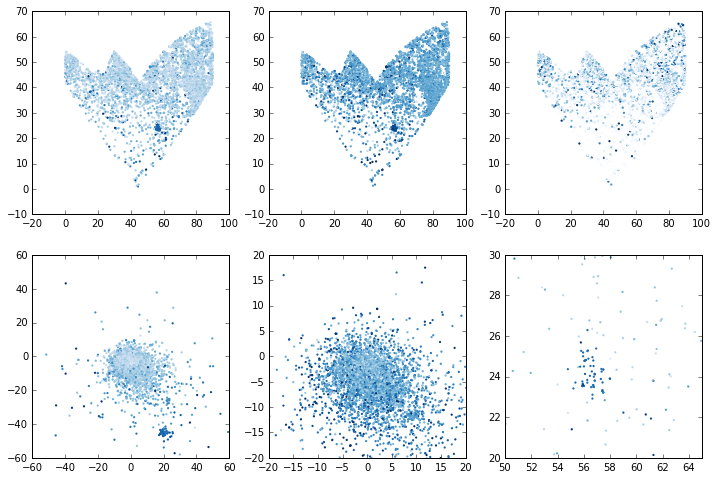

In [62]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))


colors = np.min((tgas_full[TGAS_prob['i_1']]['plx'], 10.0 * np.ones(len(TGAS_prob))), axis=0) / 10.0
ax[0,0].scatter(tgas_full[TGAS_prob['i_1']]['ra'], tgas_full[TGAS_prob['i_1']]['dec'], c=colors, s=5, cmap='Blues', edgecolors='None')

colors = np.min((tgas_full[TGAS_prob['i_1']]['mu_ra']/50.0 + 0.5, np.ones(len(TGAS_prob))), axis=0)
colors = np.max((colors, np.zeros(len(TGAS_prob))), axis=0)
ax[0,1].scatter(tgas_full[TGAS_prob['i_1']]['ra'], tgas_full[TGAS_prob['i_1']]['dec'], c=colors, s=5, cmap='Blues', edgecolors='None')


colors = np.min((tgas_full[TGAS_prob['i_1']]['mu_dec']/10.0 + 0.5, np.ones(len(TGAS_prob))), axis=0)
colors = np.max((colors, np.zeros(len(TGAS_prob))), axis=0)
ax[0,2].scatter(tgas_full[TGAS_prob['i_1']]['ra'], tgas_full[TGAS_prob['i_1']]['dec'], c=colors, s=5, cmap='Blues', edgecolors='None')


colors = np.min((tgas_full[TGAS_prob['i_1']]['plx'], 10.0 * np.ones(len(TGAS_prob))), axis=0) / 10.0
ax[1,0].scatter(tgas_full[TGAS_prob['i_1']]['mu_ra'], tgas_full[TGAS_prob['i_1']]['mu_dec'], c=colors, s=5, cmap='Blues', edgecolors='None')
ax[1,0].set_xlim(-60, 60)
ax[1,0].set_ylim(-60, 60)


colors = np.min((tgas_full[TGAS_prob['i_1']]['plx'], 5.0 * np.ones(len(TGAS_prob))), axis=0) / 5.0
ax[1,1].scatter(tgas_full[TGAS_prob['i_1']]['mu_ra'], tgas_full[TGAS_prob['i_1']]['mu_dec'], c=colors, s=5, cmap='Blues', edgecolors='None')
ax[1,1].set_xlim(-20, 20)
ax[1,1].set_ylim(-20, 20)




colors = np.min((tgas_full[TGAS_prob['i_1']]['plx'], 10.0 * np.ones(len(TGAS_prob))), axis=0) / 10.0
ax[1,2].scatter(tgas_full[TGAS_prob['i_1']]['ra'], tgas_full[TGAS_prob['i_1']]['dec'], c=colors, s=5, cmap='Blues', edgecolors='None')
ax[1,2].set_xlim(50,65)
ax[1,2].set_ylim(20,30)


plt.show()

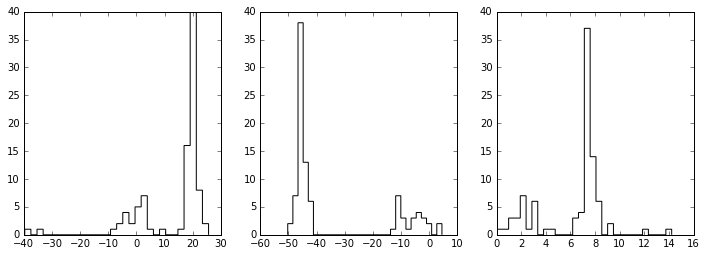

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

#plt.hist(tgas_full[TGAS_prob['i_1']]['plx'], histtype='step', color='k')
#plt.hist(tgas_full[TGAS_prob['i_1']]['mu_ra'], histtype='step', color='k', range=(-20, 20))

idx1 = np.where(np.abs(tgas_full[TGAS_prob['i_1']]['ra'] - 57.0) < 3.0)[0]
idx2 = np.where(np.abs(tgas_full[TGAS_prob['i_1']]['dec'] - 24.0) < 3.0)[0]

idx = np.intersect1d(idx1, idx2)

#plt.scatter(tgas_full[TGAS_prob['i_1'][idx]]['ra'], tgas_full[TGAS_prob['i_1'][idx]]['dec'])

ax[0].hist(tgas_full[TGAS_prob['i_1'][idx]]['mu_ra'], histtype='step', bins=30, color='k')
ax[1].hist(tgas_full[TGAS_prob['i_1'][idx]]['mu_dec'], histtype='step', bins=30, color='k')
ax[2].hist(tgas_full[TGAS_prob['i_1'][idx]]['plx'], histtype='step', bins=30, color='k')

plt.show()

In [143]:
def remove_moving_group(ra, dec, radius, mu_ra, mu_dec, plx, pairs):
    
    pairs_out = np.array([], dtype=pairs.dtype)

    pairs_removed = np.array([], dtype=pairs.dtype)
    
    for p in pairs:

        
        
        # Limit only to small subset
        if p['i_1'] > idx_max or p['i_2'] > idx_max: continue

        
        if P_random.get_theta_proj_degree(ra, dec, tgas_full[p['i_1']]['ra'], tgas_full[p['i_1']]['dec']) < radius and \
           np.abs(mu_ra-p['mu_ra_1']) < 2.0 and np.abs(mu_dec-p['mu_dec_1']) < 2.0 and \
           np.abs(plx - p['plx_1']) < 1.0:
            
            pairs_removed = np.append(pairs_removed, p)
            continue
            
        if P_random.get_theta_proj_degree(ra, dec, tgas_full[p['i_2']]['ra'], tgas_full[p['i_2']]['dec']) < radius and \
           np.abs(mu_ra-p['mu_ra_2']) < 2.0 and np.abs(mu_dec-p['mu_dec_2']) < 2.0 and \
           np.abs(plx - p['plx_2']) < 1.0:
            
            pairs_removed = np.append(pairs_removed, p)
            
            continue

            
            
        pairs_out = np.append(pairs_out, p)
        
    return pairs_out, pairs_removed

In [144]:
matches_tmp_1, Pleiades = remove_moving_group(57.0, 24.0, 4.0, 20.0, -45.0, 7.5, TGAS_prob)

In [145]:
print len(TGAS_prob)
print len(matches_tmp_1)
print len(Pleiades)

5366
5296
61


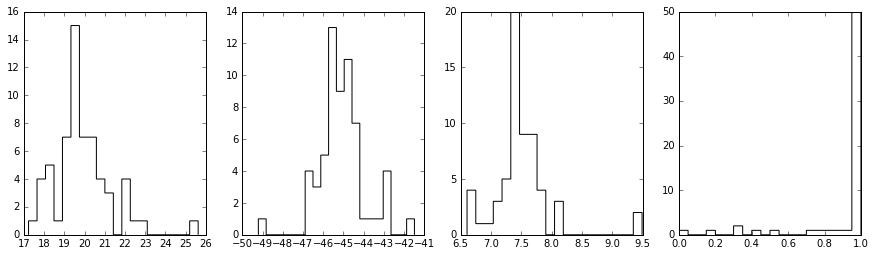

In [146]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))

ax[0].hist(Pleiades['mu_ra_1'], histtype='step', bins=20, color='k')
ax[1].hist(Pleiades['mu_dec_1'], histtype='step', bins=20, color='k')
ax[2].hist(Pleiades['plx_1'], histtype='step', bins=20, color='k')
ax[3].hist(Pleiades['P_posterior'], histtype='step', bins=20, color='k')

plt.show()